In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
import xarray as xr
from cartopy import crs, feature

In [2]:
ds = xr.open_dataset('dataset.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:    (time: 14608, longitude: 173, latitude: 97)
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01 ... 2023-12-31T18:00:00
  * longitude  (longitude) float32 -28.0 -27.75 -27.5 -27.25 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 28.0 27.75 27.5 27.25 ... 4.75 4.5 4.25 4.0
Data variables:
    blh        (time, latitude, longitude) float64 ...
    z          (time, latitude, longitude) float64 ...
    slhf       (time, latitude, longitude) float64 ...
    sshf       (time, latitude, longitude) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Wed Jun 19 07:44:54 2024: cdo -b F64 mergetime dat_2014.nc ...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [4]:
%time
slh = ds['slhf']/3600
ssh = ds['sshf']/3600
Blh=ds['blh']

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [5]:
BLH = Blh.mean(dim=['longitude', 'latitude']).groupby('time.hour').mean('time')  # Boundary Layer Height
SLH = slh.mean(dim=['longitude', 'latitude']).groupby('time.hour').mean('time')  # Latent Heat Flux
SSH = ssh.mean(dim=['longitude', 'latitude']) .groupby('time.hour').mean('time') # Sensible Heat Flux

In [6]:
blh=Blh.groupby('time.hour').mean('time')
Ssh=ssh.groupby('time.hour').mean('time')
Slh=slh.groupby('time.hour').mean('time')

In [7]:
ds_hr=xr.merge([blh,Ssh,Slh])

In [8]:
ds_hr

<xarray.Dataset>
Dimensions:    (longitude: 173, latitude: 97, hour: 4)
Coordinates:
  * longitude  (longitude) float32 -28.0 -27.75 -27.5 -27.25 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 28.0 27.75 27.5 27.25 ... 4.75 4.5 4.25 4.0
  * hour       (hour) int64 0 6 12 18
Data variables:
    blh        (hour, latitude, longitude) float64 916.7 915.4 ... 106.6 110.0
    sshf       (hour, latitude, longitude) float64 -9.417 -9.429 ... 6.791 7.208
    slhf       (hour, latitude, longitude) float64 -126.6 -126.4 ... -8.637

In [39]:
blh.valuesssss

array([[[ 916.72267121,  915.42238461,  916.07913769, ...,
          232.50052322,  232.07459823,  235.6648052 ],
        [ 920.52863711,  918.41652264,  917.81418956, ...,
          233.42230867,  229.41765934,  230.22052931],
        [ 924.38653021,  922.72030864,  921.57395749, ...,
          220.71249887,  220.36294933,  228.13278627],
        ...,
        [ 645.03377735,  642.47217634,  640.74791084, ...,
          118.14368587,  117.15641229,  117.27281312],
        [ 642.89799477,  640.92075724,  639.63018072, ...,
          120.42644847,  119.43867238,  118.19460166],
        [ 641.94977572,  640.26120722,  637.62158994, ...,
          114.53617018,  113.02376665,  111.54165562]],

       [[ 884.77971977,  885.12046771,  886.97092462, ...,
          184.73181467,  186.02789192,  188.36192847],
        [ 888.75330585,  887.96376067,  888.0567653 , ...,
          193.46652327,  190.86873987,  190.74333369],
        [ 891.50116172,  890.74640289,  888.96470866, ...,
          191.

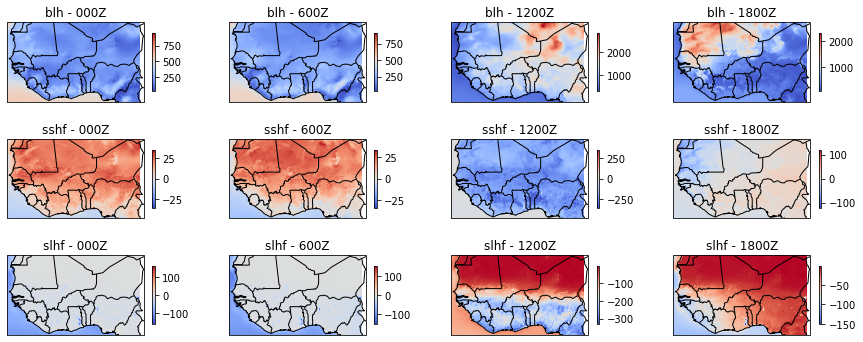

In [38]:
fig, axes = plt.subplots(nrows=len(ds_hr.data_vars), 
                        ncols=len(ds_hr.hour.values), figsize=(15,15),
                        subplot_kw={'projection':crs.PlateCarree()})
plt.subplots_adjust(hspace=-0.8, wspace=.3)

for i, var in enumerate(ds_hr.data_vars):
    for j, hour in enumerate(ds_hr.hour.values):
        cs=ds_hr[var].sel(hour=hour).plot(ax=axes[i,j], cmap='coolwarm', add_colorbar=False)
        axes[i,j].set_title(f"{var} - {hour}00Z")
        axes[i,j].coastlines()
        axes[i,j].add_feature(feature.BORDERS)
        # axes[i,j].set_extent([-25,57,-38,38])
        axes[i,j].set_extent([-18,16,4,23])
        plt.colorbar(cs,shrink=0.1)        

In [45]:
LH = slh.mean(dim=['longitude', 'latitude'])
SH = ssh.mean(dim=['longitude', 'latitude'])
BH = Blh.mean(dim=['longitude', 'latitude'])

In [54]:
BH

<xarray.DataArray 'blh' (time: 14608)>
array([380.59697342, 362.61973493, 820.83649493, ..., 194.21275423,
       728.5857915 , 242.28526553])
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 ... 2023-12-31T18:00:00

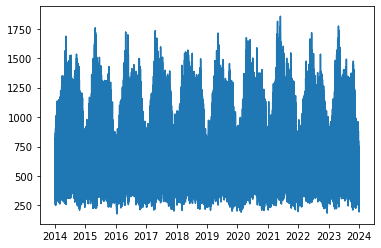

In [49]:
BH.time
plt.plot(BH.time,BH)

In [11]:
# Calculate statistics for planetary boundary layer (blh)
blh_mean = Blh.mean().values
blh_median = Blh.median().values
blh_variance = Blh.var().values
blh_std_dev = Blh.std().values
blh_iqr = Blh.quantile(0.75).values - Blh.quantile(0.25).values

# Calculate statistics for sensible heat flux (sshf)
sshf_mean = ssh.mean().values
sshf_median = ssh.median().values
sshf_variance = ssh.var().values
sshf_std_dev = ssh.std().values
sshf_iqr = ssh.quantile(0.75).values - ssh.quantile(0.25).values

# Calculate statistics for latent heat flux (slhf)
slhf_mean = slh.mean().values
slhf_median = slh.median().values
slhf_variance = slh.var().values
slhf_std_dev = slh.std().values
slhf_iqr = slh.quantile(0.75).values - slh.quantile(0.25).values

# Create a DataFrame to display the statistics
data = {
    'Variable': ['Planetary Boundary Layer (BLH)', 'Sensible Heat Flux (SSHf)', 'Latent Heat Flux (SLHf)'],
    'Mean': [blh_mean, sshf_mean, slhf_mean],
    'Median': [blh_median, sshf_median, slhf_median],
    'Variance': [blh_variance, sshf_variance, slhf_variance],
    'Standard Deviation': [blh_std_dev, sshf_std_dev, slhf_std_dev],
    'Inter Quartile Range (IQR)': [blh_iqr, sshf_iqr, slhf_iqr]
}

df = pd.DataFrame(data)

# Print the DataFrame
df


,Variable,Mean,Median,Variance,Standard Deviation,Inter Quartile Range (IQR)
0,Planetary Boundary Layer (BLH),643.9500381932392,455.8731621869333,508867.0496029534,713.3491778946362,592.520735
1,Sensible Heat Flux (SSHf),-32.091430667460635,-2.0113828529137794,7853.919302489181,88.62234087683072,25.900272
2,Latent Heat Flux (SLHf),-54.94726923822387,-12.057830969808274,5629.474876211151,75.02982657724294,89.497987


In [12]:
BLH_month = Blh.mean(dim=['longitude', 'latitude']).groupby('time.month').mean('time')  # Boundary Layer Height
SLH_month = slh.mean(dim=['longitude', 'latitude']).groupby('time.month').mean('time')  # Latent Heat Flux
SSH_month = ssh.mean(dim=['longitude', 'latitude']) .groupby('time.month').mean('time') # Sensible Heat Flux

In [13]:
BLH_month

<xarray.DataArray 'blh' (month: 12)>
array([486.68173747, 556.07241045, 640.42694978, 720.28269512,
       782.44433554, 779.39510845, 806.92244584, 744.53997214,
       655.52022732, 572.43393365, 501.08447455, 476.25503881])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [92]:
Sahel_zones=ds.sshf.sel(longitude=slice(-18,18),latitude=slice(16,12))/3600
Guinea_zone=ds.sshf.sel(longitude=slice(-18,18),latitude=slice(8,4))/3600
Sudan_zone=ds.sshf.sel(longitude=slice(-18,18),latitude=slice(20,16))/3600
Sudano_Sahelian=ds.sshf.sel(longitude=slice(-18,18),latitude=slice(12,8))/3600

In [99]:
SZ= Sudan_zone.mean(dim=['longitude', 'latitude']).groupby('time.hour').mean('time')
SS= Sudano_Sahelian.mean(dim=['longitude', 'latitude']).groupby('time.hour').mean('time')
GZ= Guinea_zone.mean(dim=['longitude', 'latitude']).groupby('time.hour').mean('time')
SHZ= Sahel_zones.mean(dim=['longitude', 'latitude']).groupby('time.hour').mean('time')

In [94]:
Sahel_zones=ds.blh.sel(longitude=slice(-18,18),latitude=slice(16,12))
Guinea_zone=ds.blh.sel(longitude=slice(-18,18),latitude=slice(8,4))
Sudan_zone=ds.blh.sel(longitude=slice(-18,18),latitude=slice(20,16))
Sudano_Sahelian=ds.blh.sel(longitude=slice(-18,18),latitude=slice(12,8))

In [ ]:
SZ_BLH = Sudan_zone.mean(dim=['longitude', 'latitude']).groupby('time.hour').mean('time')
SS_BLH = Su

In [97]:
Sahel_zones=ds.slhf.sel(longitude=slice(-18,18),latitude=slice(16,12))/3600
Guinea_zone=ds.sel(longitude=slice(-18,18),latitude=slice(8,4))/3600
Sudan_zone=ds.sel(longitude=slice(-18,18),latitude=slice(20,16))/3600
Sudano_Sahelian=ds.sshf.sel(longitude=slice(-18,18),latitude=slice(12,8))/3600

In [98]:
Sahel_zones

<xarray.DataArray 'slhf' (time: 14608, latitude: 17, longitude: 133)>
array([[[-8.74944684e+01, -8.79214324e+01, -8.10621637e+01, ...,
         -2.82441336e-01, -2.82441336e-01, -2.82441336e-01],
        [-8.67519224e+01, -8.02082358e+01, -6.87823093e+01, ...,
         -2.82441336e-01, -2.82441336e-01, -2.82441336e-01],
        [-8.73923683e+01, -7.41657678e+01, -5.50173630e+01, ...,
         -3.01004986e-01, -3.01004986e-01, -7.09405283e-01],
        ...,
        [-1.14309661e+02, -1.12249096e+02, -1.01203724e+02, ...,
         -5.95363637e+00, -8.83100210e+00, -1.06131125e+01],
        [-1.25457132e+02, -1.23804968e+02, -1.10968204e+02, ...,
         -6.78900061e+00, -1.15877041e+01, -1.40009786e+01],
        [-1.36586040e+02, -1.30487881e+02, -1.17790345e+02, ...,
         -6.14855469e+00, -8.63608378e+00, -1.13927858e+01]],

       [[-1.04368826e+02, -1.29828872e+02, -1.58500429e+02, ...,
         -1.71059437e-01, -1.71059437e-01, -1.89623086e-01],
        [-1.02308261e+02, -1.16620835e+02, -1.37272896e+02, ...,
         -1.71059437e-01, -1.71059437e-01, -1.89623086e-01],
        [-1.00665378e+02, -1.03765508e+02, -1.06605746e+02, ...,
         -1.89623086e-01, -1.89623086e-01, -4.21668710e-01],
...
        [-1.49899122e+02, -1.68456144e+02, -1.61914688e+02, ...,
         -9.69017051e+01, -8.52560114e+01, -7.99826891e+01],
        [-1.49169945e+02, -1.67748103e+02, -1.60001920e+02, ...,
         -9.34249054e+01, -9.29704909e+01, -1.01403579e+02],
        [-1.41719660e+02, -1.61344028e+02, -1.58110287e+02, ...,
         -9.66903495e+01, -8.96310723e+01, -8.08492471e+01]],

       [[-1.40736857e+02, -1.32113548e+02, -1.32821590e+02, ...,
         -5.02414979e-01, -5.02414979e-01, -5.02414979e-01],
        [-1.32113548e+02, -1.22782199e+02, -1.21979047e+02, ...,
         -5.23550539e-01, -5.23550539e-01, -5.23550539e-01],
        [-1.18977798e+02, -1.13091544e+02, -1.10935717e+02, ...,
         -5.34118320e-01, -5.34118320e-01, -5.76389440e-01],
        ...,
        [-1.17413766e+02, -1.24747806e+02, -9.45450901e+01, ...,
         -5.65949167e+00, -5.90255061e+00, -5.99766063e+00],
        [-1.12151012e+02, -1.07839357e+02, -8.25612275e+01, ...,
         -5.69119501e+00, -7.12841310e+00, -7.50885319e+00],
        [-1.09498499e+02, -1.08462856e+02, -8.68834495e+01, ...,
         -5.73346613e+00, -6.51548186e+00, -7.12841310e+00]]])
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01 ... 2023-12-31T18:00:00
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 16.0 15.75 15.5 15.25 ... 12.5 12.25 12.0

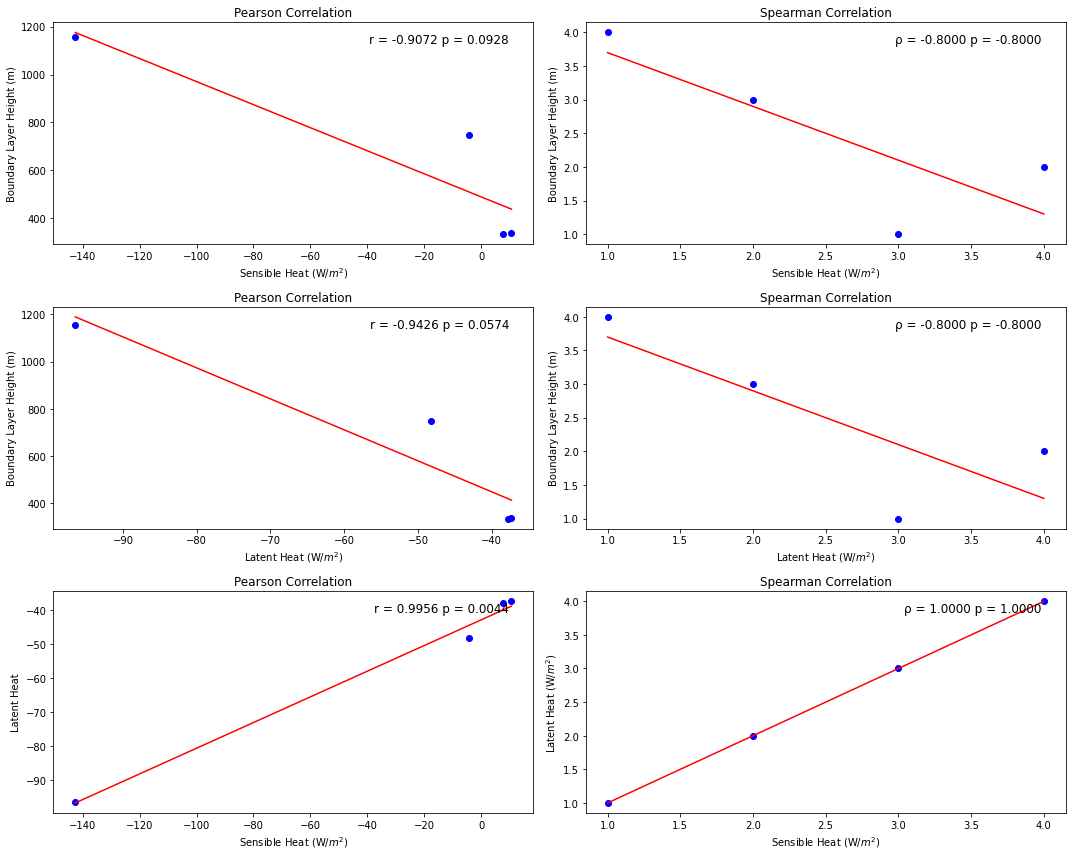

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Plot on the first subplot (0,0)
ax1 = axes[0, 0]
pearson_corr, pearson_p = pearsonr(SSH,BLH)
ax1.scatter(SSH, BLH, color='b')
axes[0, 0].plot(np.unique(SSH), np.poly1d(np.polyfit(SSH, BLH, 1))(np.unique(SSH)), color='r')
axes[0, 0].set_title('Pearson Correlation')
axes[0, 0].set_xlabel('Sensible Heat (W/$m^2$)')
axes[0, 0].set_ylabel('Boundary Layer Height (m)')
ax1.text(0.95, 0.95, f'r = {pearson_corr:.4f} p = {pearson_p:.4f}',
         fontsize=12, color='black', ha='right', va='top',
         transform=ax1.transAxes)

ax2=axes[1,0]
pearson_corr, pearson_p = pearsonr(SLH,BLH)
ax2.scatter(SLH, BLH, color='b')
ax2.plot(np.unique(SLH), np.poly1d(np.polyfit(SLH, BLH, 1))(np.unique(SLH)), color='r')
ax2.set_title('Pearson Correlation')
ax2.set_xlabel('Latent Heat (W/$m^2$)')
ax2.set_ylabel('Boundary Layer Height (m)')
ax2.text(0.95, 0.95, f'r = {pearson_corr:.4f} p = {pearson_p:.4f}',
         fontsize=12, color='black', ha='right', va='top',
         transform=ax2.transAxes)

ax3=axes[2,0]
pearson_corr, pearson_p = pearsonr(SSH,SLH)
ax3.scatter(SSH, SLH, color='b')
ax3.plot(np.unique(SSH), np.poly1d(np.polyfit(SSH, SLH, 1))(np.unique(SSH)), color='r')
ax3.set_title('Pearson Correlation')
ax3.set_xlabel('Sensible Heat (W/$m^2$)')
ax3.set_ylabel('Latent Heat')
ax3.text(0.95, 0.95, f'r = {pearson_corr:.4f} p = {pearson_p:.4f}',
         fontsize=12, color='black', ha='right', va='top',
         transform=ax3.transAxes)


SSH_rank = SSH.rank(dim='hour')
BLH_rank = BLH.rank(dim='hour')
SLH_rank = SLH.rank(dim='hour')
# Flatten the DataArrays for correlation and plotting
SSH_rank_flat = SSH_rank.values.flatten()
BLH_rank_flat = BLH_rank.values.flatten()
SLH_rank_flat = SLH_rank.values.flatten()
# Compute Spearman correlation
spearman_corr, spearman_p = spearmanr(SSH_rank_flat, BLH_rank_flat)

spearman_corr, spearman_p = spearmanr(SSH, BLH)
axes[0,1].scatter(SSH_rank_flat, BLH_rank_flat, color='b')
# Fit line
fit_line = np.poly1d(np.polyfit(SSH_rank_flat, BLH_rank_flat, 1))
axes[0,1].plot(np.unique(SSH_rank_flat), fit_line(np.unique(SSH_rank_flat)), color='r')

# Set titles and labels
axes[0,1].set_title('Spearman Correlation')
axes[0,1].set_xlabel('Sensible Heat (W/$m^2$)')
axes[0,1].set_ylabel('Boundary Layer Height (m)')
axes[0,1].text(0.95, 0.95, f'ρ = {spearman_corr:.4f} p = {spearman_corr:.4f}',
         fontsize=12, color='black', ha='right', va='top',
         transform=axes[0,1].transAxes)

ax4=axes[1,1]
spearman_corr, spearman_p = spearmanr(SLH_rank_flat, BLH_rank_flat)
spearman_corr, spearman_p = spearmanr(SLH, BLH)
ax4.scatter(SLH_rank_flat, BLH_rank_flat, color='b')
fit_line = np.poly1d(np.polyfit(SLH_rank_flat, BLH_rank_flat, 1))
ax4.plot(np.unique(SLH_rank_flat), fit_line(np.unique(SLH_rank_flat)), color='r')
ax4.set_title('Spearman Correlation')
ax4.set_xlabel('Latent Heat (W/$m^2$)')
ax4.set_ylabel('Boundary Layer Height (m)')
ax4.text(0.95, 0.95, f'ρ = {spearman_corr:.4f} p = {spearman_corr:.4f}',
         fontsize=12, color='black', ha='right', va='top',
         transform=ax4.transAxes)


ax5=axes[2,1]
spearman_corr, spearman_p = spearmanr(SSH_rank_flat, SLH_rank_flat)
spearman_corr, spearman_p = spearmanr(SSH, SLH)
ax5.scatter(SSH_rank_flat, SLH_rank_flat, color='b')
fit_line = np.poly1d(np.polyfit(SSH_rank_flat, SLH_rank_flat, 1))
ax5.plot(np.unique(SSH_rank_flat), fit_line(np.unique(SSH_rank_flat)), color='r')
ax5.set_title('Spearman Correlation')
ax5.set_xlabel('Sensible Heat (W/$m^2$) ')
ax5.set_ylabel('Latent Heat (W/$m^2$) ')
ax5.text(0.95, 0.95, f'ρ = {spearman_corr:.4f} p = {spearman_corr:.4f}',
         fontsize=12, color='black', ha='right', va='top',
         transform=ax5.transAxes)





plt.tight_layout()

# Show the plot
plt.show()
# plt.savefig('BL.svg')

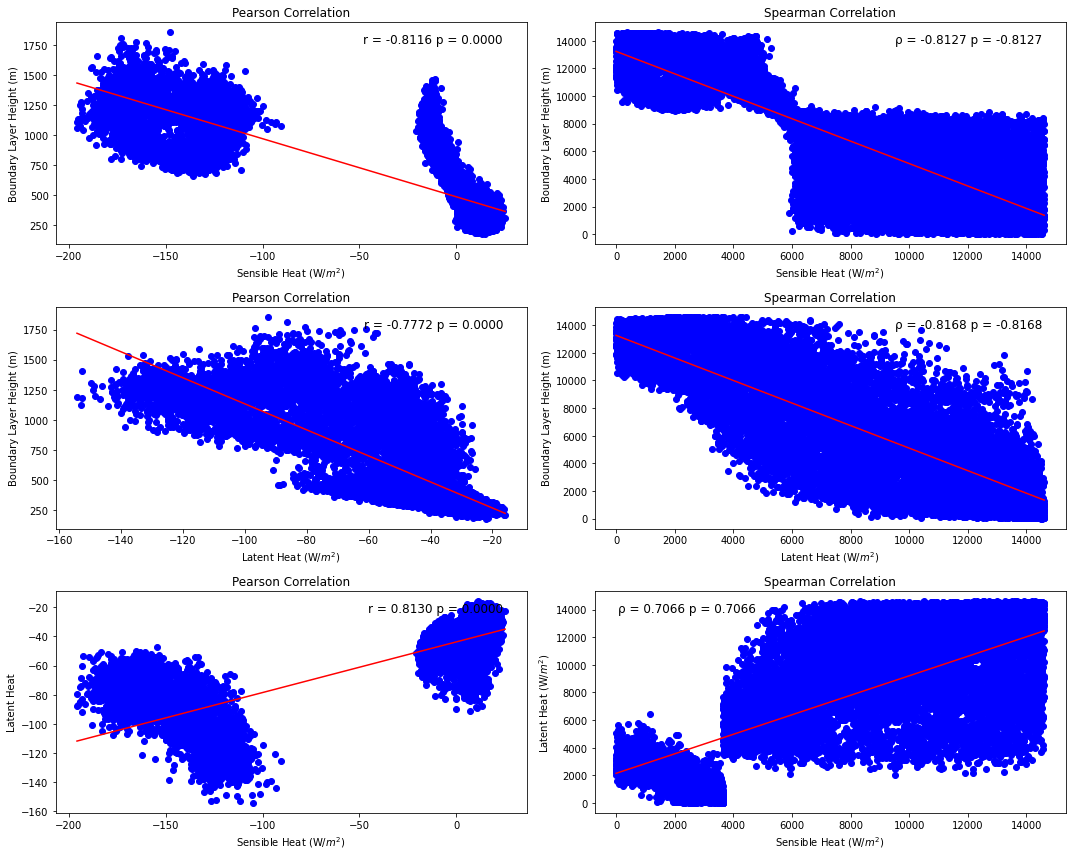

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Plot on the first subplot (0,0)
ax1 = axes[0, 0]
pearson_corr, pearson_p = pearsonr(SH,BH)
ax1.scatter(SH, BH, color='b')
axes[0, 0].plot(np.unique(SH), np.poly1d(np.polyfit(SH, BH, 1))(np.unique(SH)), color='r')
axes[0, 0].set_title('Pearson Correlation')
axes[0, 0].set_xlabel('Sensible Heat (W/$m^2$)')
axes[0, 0].set_ylabel('Boundary Layer Height (m)')
ax1.text(0.95, 0.95, f'r = {pearson_corr:.4f} p = {pearson_p:.4f}',
         fontsize=12, color='black', ha='right', va='top',
         transform=ax1.transAxes)

ax2=axes[1,0]
pearson_corr, pearson_p = pearsonr(LH,BH)
ax2.scatter(LH, BH, color='b')
ax2.plot(np.unique(LH), np.poly1d(np.polyfit(LH, BH, 1))(np.unique(LH)), color='r')
ax2.set_title('Pearson Correlation')

ax2.set_xlabel('Latent Heat (W/$m^2$)')

ax2.set_ylabel('Boundary Layer Height (m)')
ax2.text(0.95, 0.95, f'r = {pearson_corr:.4f} p = {pearson_p:.4f}',
         fontsize=12, color='black', ha='right', va='top',
         transform=ax2.transAxes)

ax3=axes[2,0]
pearson_corr, pearson_p = pearsonr(SH,LH)
ax3.scatter(SH, LH, color='b')
ax3.plot(np.unique(SH), np.poly1d(np.polyfit(SH, LH, 1))(np.unique(SH)), color='r')
ax3.set_title('Pearson Correlation')
ax3.set_xlabel('Sensible Heat (W/$m^2$)')
ax3.set_ylabel('Latent Heat')
ax3.text(0.95, 0.95, f'r = {pearson_corr:.4f} p = {pearson_p:.4f}',
         fontsize=12, color='black', ha='right', va='top',
         transform=ax3.transAxes)


SH_rank = SH.rank(dim='time')
BH_rank = BH.rank(dim='time')
LH_rank = LH.rank(dim='time')
# Flatten the DataArrays for correlation and plotting
SH_rank_flat = SH_rank.values.flatten()
BH_rank_flat = BH_rank.values.flatten()
LH_rank_flat = LH_rank.values.flatten()
# Compute Spearman correlation
spearman_corr, spearman_p = spearmanr(SH_rank_flat, BH_rank_flat)

spearman_corr, spearman_p = spearmanr(SH, BH)
axes[0,1].scatter(SH_rank_flat, BH_rank_flat, color='b')
# Fit line
fit_line = np.poly1d(np.polyfit(SH_rank_flat, BH_rank_flat, 1))
axes[0,1].plot(np.unique(SH_rank_flat), fit_line(np.unique(SH_rank_flat)), color='r')

# Set titles and labels
axes[0,1].set_title('Spearman Correlation')
axes[0,1].set_xlabel('Sensible Heat (W/$m^2$)')
axes[0,1].set_ylabel('Boundary Layer Height (m)')
axes[0,1].text(0.95, 0.95, f'ρ = {spearman_corr:.4f} p = {spearman_corr:.4f}',
         fontsize=12, color='black', ha='right', va='top',
         transform=axes[0,1].transAxes)

ax4=axes[1,1]
spearman_corr, spearman_p = spearmanr(LH_rank_flat, BH_rank_flat)
spearman_corr, spearman_p = spearmanr(LH, BH)
ax4.scatter(LH_rank_flat, BH_rank_flat, color='b')
fit_line = np.poly1d(np.polyfit(LH_rank_flat, BH_rank_flat, 1))
ax4.plot(np.unique(LH_rank_flat), fit_line(np.unique(LH_rank_flat)), color='r')
ax4.set_title('Spearman Correlation')
ax4.set_xlabel('Latent Heat (W/$m^2$)')
ax4.set_ylabel('Boundary Layer Height (m)')
ax4.text(0.95, 0.95, f'ρ = {spearman_corr:.4f} p = {spearman_corr:.4f}',
         fontsize=12, color='black', ha='right', va='top',
         transform=ax4.transAxes)


ax5=axes[2,1]
spearman_corr, spearman_p = spearmanr(SH_rank_flat, LH_rank_flat)
spearman_corr, spearman_p = spearmanr(SH, LH)
ax5.scatter(SH_rank_flat, LH_rank_flat, color='b')
fit_line = np.poly1d(np.polyfit(SH_rank_flat, LH_rank_flat, 1))
ax5.plot(np.unique(SH_rank_flat), fit_line(np.unique(SH_rank_flat)), color='r')
ax5.set_title('Spearman Correlation')
ax5.set_xlabel('Sensible Heat (W/$m^2$) ')
ax5.set_ylabel('Latent Heat (W/$m^2$) ')
ax5.text(0.05, 0.95, f'ρ = {spearman_corr:.4f} p = {spearman_corr:.4f}',
         fontsize=12, color='black', ha='left', va='top',
         transform=ax5.transAxes)





plt.tight_layout()

# Show the plot
plt.show()
# plt.savefig('BL.svg')

In [18]:
y = BLH
y1 = SSH
y2 = SLH
x = [0,6,12,18]
hours=[0,6,12,18]

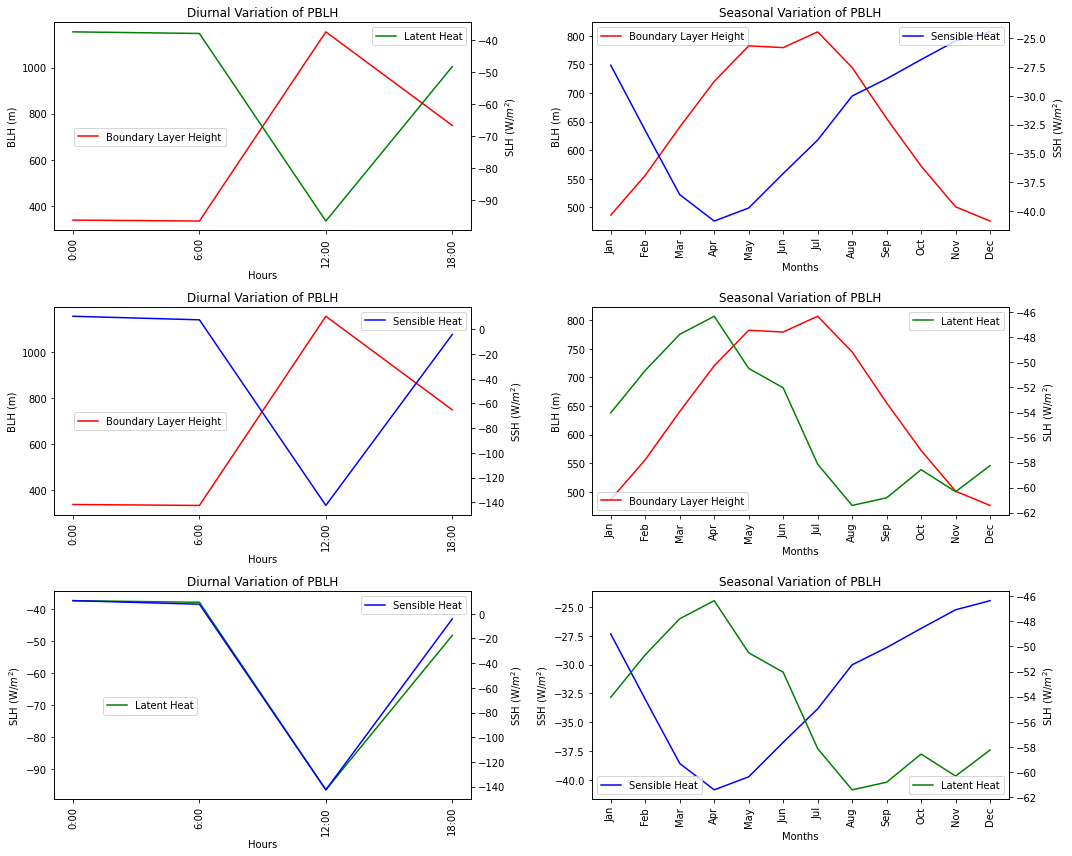

<Figure size 432x288 with 0 Axes>

In [20]:
months = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Plot on the first subplot (0,0)
ax1 = axes[0, 0]
ax1.plot(x, BLH, color='r', label='Boundary Layer Height')
ax1.set_xlabel('Hours')
ax1.set_ylabel('BLH (m)')
ax1.legend(loc='center',bbox_to_anchor=(0.23, 0.45))
ax1.set_xticks(hours)  # Set x-axis ticks
ax1.set_xticklabels([f'{hour}:00' for hour in hours], rotation=90)  # Customize x-axis labels
ax1.set_title('Diurnal Variation of PBLH')
# ax1.legend(loc='upper left')
# Create a twin axis to overlay SLH data
ax1_twin = ax1.twinx()
ax1_twin.plot(x, SLH, color='g', label='Latent Heat' , alpha= 1.0)
ax1_twin.set_ylabel('SLH (W/$m^2$)')
ax1_twin.legend(loc='upper right')

# Plot on the first subplot (1,0)
ax2 = axes[1, 0]
ax2.plot(x, BLH, color='r', label='Boundary Layer Height')
ax2.set_xlabel('Hours')
ax2.set_ylabel('BLH (m)')
ax2.legend(loc='center',bbox_to_anchor=(0.23, 0.45))
ax2.set_xticks(hours)  # Set x-axis ticks
ax2.set_xticklabels([f'{hour}:00' for hour in hours], rotation=90)  # Customize x-axis labels
ax2.set_title('Diurnal Variation of PBLH')
# ax1.legend(loc='upper left')
# Create a twin axis to overlay SLH data
ax2_twin = ax2.twinx()
ax2_twin.plot(x, SSH, color='b', label='Sensible Heat' , alpha= 1.0)
ax2_twin.set_ylabel('SSH (W/$m^2$)')
ax2_twin.legend(loc='upper right')


# Plot on the first subplot (2,0)
ax3 = axes[2, 0]
ax3.plot(x, SLH, color='g', label='Latent Heat')
ax3.set_xlabel('Hours')
ax3.set_ylabel('SLH (W/$m^2$)')
ax3.legend(loc='center',bbox_to_anchor=(0.23, 0.45))
ax3.set_xticks(hours)  # Set x-axis ticks
ax3.set_xticklabels([f'{hour}:00' for hour in hours], rotation=90)  # Customize x-axis labels
ax3.set_title('Diurnal Variation of PBLH')
# ax1.legend(loc='upper left')
# Create a twin axis to overlay SLH data
ax3_twin = ax3.twinx()
ax3_twin.plot(x, SSH, color='b', label='Sensible Heat' , alpha= 1.0)
ax3_twin.set_ylabel('SSH (W/$m^2$)')
ax3_twin.legend(loc='upper right')

ax4 = axes[0, 1]
ax4.plot(BLH_month.month,BLH_month, color='r', label='Boundary Layer Height')
ax4.set_xlabel('Months')
ax4.set_ylabel('BLH (m)')
ax4.legend(loc='upper left')#bbox_to_anchor=(0.23, 0.45))
ax4.set_xticks(BLH_month.month)  # Set x-axis ticks
ax4.set_xticklabels(months, rotation=90)  # Customize x-axis labels
ax4.set_title('Seasonal Variation of PBLH')
# ax1.legend(loc='upper left')
# Create a twin axis to overlay SLH data
ax4_twin = ax4.twinx()
ax4_twin.plot(SSH_month.month,SSH_month, color='b', label='Sensible Heat' , alpha= 1.0)
ax4_twin.set_ylabel('SSH (W/$m^2$)')
ax4_twin.legend(loc='upper right')

ax5 = axes[1, 1]
ax5.plot(BLH_month.month,BLH_month, color='r', label='Boundary Layer Height')
ax5.set_xlabel('Months')
ax5.set_ylabel('BLH (m)')
ax5.legend(loc='lower left')#bbox_to_anchor=(0.23, 0.45))
ax5.set_xticks(BLH_month.month)  # Set x-axis ticks
ax5.set_xticklabels(months, rotation=90)  # Customize x-axis labels
ax5.set_title('Seasonal Variation of PBLH')
# ax1.legend(loc='upper left')
# Create a twin axis to overlay SLH data
ax5_twin = ax5.twinx()
ax5_twin.plot(SLH_month.month,SLH_month, color='g', label='Latent Heat' , alpha= 1.0)
ax5_twin.set_ylabel('SLH (W/$m^2$)')
ax5_twin.legend(loc='upper right')

ax6 = axes[2, 1]
ax6.plot(SSH_month.month,SSH_month, color='b', label='Sensible Heat')
ax6.set_xlabel('Months')
ax6.set_ylabel('SSH (W/$m^2$)')
ax6.legend(loc='lower left')#bbox_to_anchor=(0.23, 0.45))
ax6.set_xticks(BLH_month.month)  # Set x-axis ticks
ax6.set_xticklabels(months, rotation=90)  # Customize x-axis labels
ax6.set_title('Seasonal Variation of PBLH')
# ax1.legend(loc='upper left')
# Create a twin axis to overlay SLH data
ax6_twin = ax6.twinx()
ax6_twin.plot(SLH_month.month,SLH_month, color='g', label='Latent Heat' , alpha= 1.0)
ax6_twin.set_ylabel('SLH (W/$m^2$)')
ax6_twin.legend(loc='lower right')
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig('BL.svg')